# Exploratory data analysis

In [1]:
import pandas as pd
import csv 

## Data loading

### Subtask:
Load the two CSV files into pandas DataFrames.


In [2]:
# Load the data
df1 = pd.read_csv('bank marketing dataset 1.csv')
df2 = pd.read_csv('bank marketinf data set 2.csv')
display(df1.head())
display(df2.head())



,age;job;marital;education;default;housing;loan;contact;month;day_of_week;duration;campaign;pdays;previous;poutcome;y
0,56;housemaid;married;basic.4y;no;no;no;telepho...
1,57;services;married;high.school;unknown;no;no;...
2,37;services;married;high.school;no;yes;no;tele...
3,40;admin.;married;basic.6y;no;no;no;telephone;...
4,56;services;married;high.school;no;no;yes;tele...


,age;job;marital;education;default;balance;housing;loan;contact;day;month;duration;campaign;pdays;previous;poutcome;y
0,58;management;married;tertiary;True;2143;True;...
1,44;technician;single;secondary;True;29;True;Tr...
2,33;entrepreneur;married;secondary;True;2;True;...
3,47;blue-collar;married;unknown;True;1506;True;...
4,33;unknown;single;unknown;True;1;True;True;unk...


## Data exploration

### Subtask:
Exploration of structure and descriptive statistics of the two dataframes loaded.


In [3]:
# Split the single column into multiple columns
df1 = df1['age;job;marital;education;default;housing;loan;contact;month;day_of_week;duration;campaign;pdays;previous;poutcome;y'].str.split(';', expand=True)
df2 = df2['age;job;marital;education;default;balance;housing;loan;contact;day;month;duration;campaign;pdays;previous;poutcome;y'].str.split(';', expand=True)

# Assign column names
df1.columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df2.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

# Convert appropriate columns to numeric types
df1['age'] = pd.to_numeric(df1['age'], errors='coerce')
df1['duration'] = pd.to_numeric(df1['duration'], errors='coerce')
df1['campaign'] = pd.to_numeric(df1['campaign'], errors='coerce')
df1['pdays'] = pd.to_numeric(df1['pdays'], errors='coerce')
df1['previous'] = pd.to_numeric(df1['previous'], errors='coerce')

df2['age'] = pd.to_numeric(df2['age'], errors='coerce')
df2['balance'] = pd.to_numeric(df2['balance'], errors='coerce')
df2['duration'] = pd.to_numeric(df2['duration'], errors='coerce')
df2['campaign'] = pd.to_numeric(df2['campaign'], errors='coerce')
df2['pdays'] = pd.to_numeric(df2['pdays'], errors='coerce')
df2['previous'] = pd.to_numeric(df2['previous'], errors='coerce')

# Data Shape and Types
print("DataFrame df1 shape:", df1.shape)
print("DataFrame df2 shape:", df2.shape)
print("\nDataFrame df1 data types:\n", df1.dtypes)
print("\nDataFrame df2 data types:\n", df2.dtypes)

# Missing Values
print("\nDataFrame df1 missing values:\n", df1.isnull().sum())
print("\nDataFrame df2 missing values:\n", df2.isnull().sum())

# Unique Values (Categorical Columns)
categorical_cols_df1 = df1.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols_df1:
    print(f"\nDataFrame df1 - Unique values for {col}:\n{df1[col].value_counts()}")

categorical_cols_df2 = df2.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols_df2:
    print(f"\nDataFrame df2 - Unique values for {col}:\n{df2[col].value_counts()}")

# Descriptive Statistics (Numerical Columns)
numerical_cols_df1 = df1.select_dtypes(include=['number']).columns
print(f"\nDataFrame df1 - Descriptive statistics for numerical columns:\n{df1[numerical_cols_df1].describe()}")

numerical_cols_df2 = df2.select_dtypes(include=['number']).columns
print(f"\nDataFrame df2 - Descriptive statistics for numerical columns:\n{df2[numerical_cols_df2].describe()}")

DataFrame df1 shape: (41176, 16)
DataFrame df2 shape: (45211, 17)

DataFrame df1 data types:
 age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

DataFrame df2 data types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day          object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

DataFrame df1 missing values:
 age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact

## Data analysis

### Subtask:
Analysis of potential relationships and correlations between variables, and identifying differences in data distributions between the two datasets (`df1` and `df2`)


In [4]:
import pandas as pd
import numpy as np

# Correlation Analysis
numerical_cols_df1 = df1.select_dtypes(include=np.number).columns
correlation_matrix_df1 = df1[numerical_cols_df1].corr()
print("Correlation Matrix for df1:\n", correlation_matrix_df1)

numerical_cols_df2 = df2.select_dtypes(include=np.number).columns
correlation_matrix_df2 = df2[numerical_cols_df2].corr()
print("\nCorrelation Matrix for df2:\n", correlation_matrix_df2)


# Comparative Analysis of Numerical Variables
numerical_variables = ['age', 'duration', 'campaign', 'pdays', 'previous']
for col in numerical_variables:
    if col in df1.columns and col in df2.columns:
        print(f"\nComparison of {col}:")
        print("df1:", df1[col].describe())
        print("df2:", df2[col].describe())
    elif col in df1.columns:
        print(f"\n{col} only in df1:")
        print(df1[col].describe())
    elif col in df2.columns:
        print(f"\n{col} only in df2:")
        print(df2[col].describe())

# Comparative Analysis of Categorical Variables
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_variables:
    if col in df1.columns and col in df2.columns:
      print(f"\nComparison of {col}:")
      print("df1:\n", df1[col].value_counts(normalize=True))
      print("\ndf2:\n", df2[col].value_counts(normalize=True))
    elif col in df1.columns:
        print(f"\n{col} only in df1:")
        print(df1[col].value_counts(normalize=True))
    elif col in df2.columns:
        print(f"\n{col} only in df2:")
        print(df2[col].value_counts(normalize=True))

# Joint Analysis
if 'job' in df1.columns and 'duration' in df1.columns:
    print("\nJoint Analysis (df1): Duration vs. Job")
    print(df1.groupby('job')['duration'].mean())

if 'job' in df2.columns and 'duration' in df2.columns:
    print("\nJoint Analysis (df2): Duration vs. Job")
    print(df2.groupby('job')['duration'].mean())

Correlation Matrix for df1:
                age  duration  campaign     pdays  previous
age       1.000000 -0.000808  0.004622 -0.034381  0.024379
duration -0.000808  1.000000 -0.071765 -0.047556  0.020600
campaign  0.004622 -0.071765  1.000000  0.052606 -0.079182
pdays    -0.034381 -0.047556  0.052606  1.000000 -0.587508
previous  0.024379  0.020600 -0.079182 -0.587508  1.000000

Correlation Matrix for df2:
                age   balance  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.021560 -0.014578  0.003435  0.016674
duration -0.004648  0.021560  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674  0.001203 -0.032855  0.454820  1.000000

Comparison of age:
df1: count    41176.00000
mean        40.02380
std         10.42068
min         17.0

## Data preparation

### Subtask:
Combine the two dataframes, `df1` and `df2`, into a single dataframe.


In [5]:
import pandas as pd

# Identify common columns
common_cols = list(set(df1.columns).intersection(df2.columns))

# Handle data type mismatches and rename columns
# Convert boolean columns in df2 to string to match df1
for col in ['default', 'housing', 'loan']:
    df2[col] = df2[col].astype(str).str.lower()


# Merge the two dataframes
df_combined = pd.merge(df1, df2, on=common_cols, how='outer', suffixes=('_df1', '_df2'))
display(df_combined.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,balance,day
0,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,4,2,success,True,NaN,NaN
1,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,999,2,failure,True,NaN,NaN
2,17,student,single,unknown,no,yes,no,cellular,aug,wed,432,3,4,2,success,True,NaN,NaN
3,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,498,2,999,1,failure,True,NaN,NaN
4,17,student,single,unknown,no,no,yes,cellular,oct,tue,896,1,2,2,success,True,NaN,NaN


In [6]:
# Check the columns in the merged dataframe
print(df_combined.columns)

# Inspect the 'day' column in both original dataframes
print(df1.columns)
print(df2.columns)

# Try concatenating the dataframes after aligning column names and data types
df1_renamed = df1.rename(columns={'day_of_week': 'day'})
df2_renamed = df2.rename(columns={'job': 'job_type'})

# Convert relevant columns to the same data type in df1 and df2
for col in ['default', 'housing', 'loan']:
  df1[col] = df1[col].astype(str).str.lower()

df_combined_concat = pd.concat([df1_renamed, df2_renamed], axis=0, ignore_index=True)
display(df_combined_concat.head())

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'balance', 'day'],
      dtype='object')
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day,duration,campaign,pdays,previous,poutcome,y,job_type,balance
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,True,NaN,NaN
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,True,NaN,NaN
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,True,NaN,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,True,NaN,NaN
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,True,NaN,NaN


In [7]:
# Drop the 'job' column from df2 before concatenating
df2_dropped = df2.drop(columns=['job'])

# Concatenate the dataframes
df_combined = pd.concat([df1_renamed, df2_dropped], axis=0, ignore_index=True)

display(df_combined.head())

,age,job,marital,education,default,housing,loan,contact,month,day,duration,campaign,pdays,previous,poutcome,y,balance
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,True,NaN
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,True,NaN
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,True,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,True,NaN
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,True,NaN


## Data preparation

### Subtask:
Combine the two datasets, `df1` and `df2`, into a single dataframe named `df_combined`.


In [8]:
# Rename columns in df1 to match df2
df1 = df1.rename(columns={'day_of_week': 'day'})

# Convert boolean columns in df2 to string type to match df1
for col in ['default', 'housing', 'loan']:
    df2[col] = df2[col].astype(str)

# Drop 'day_of_week' from df1
df1 = df1.drop(columns=['day_of_week'], errors='ignore')

# Concatenate the dataframes
df_combined = pd.concat([df1, df2], ignore_index=True)

# Display first few rows and columns of the combined dataframe
display(df_combined.head())
print(df_combined.columns)

# Check for NaN values in the combined dataframe
print(df_combined.isnull().sum())

,age,job,marital,education,default,housing,loan,contact,month,day,duration,campaign,pdays,previous,poutcome,y,balance
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,True,NaN
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,True,NaN
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,True,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,True,NaN
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,True,NaN


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'balance'],
      dtype='object')
age              0
job              0
marital          0
education        0
default          0
housing          0
loan             0
contact          0
month            0
day              0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
y                0
balance      41176
dtype: int64


## Data visualization

### Subtask:
Visualize the distribution of key numerical variables in the combined dataset `df_combined` using histograms and box plots.  Also, visualize the distribution of categorical variables using bar charts or count plots.


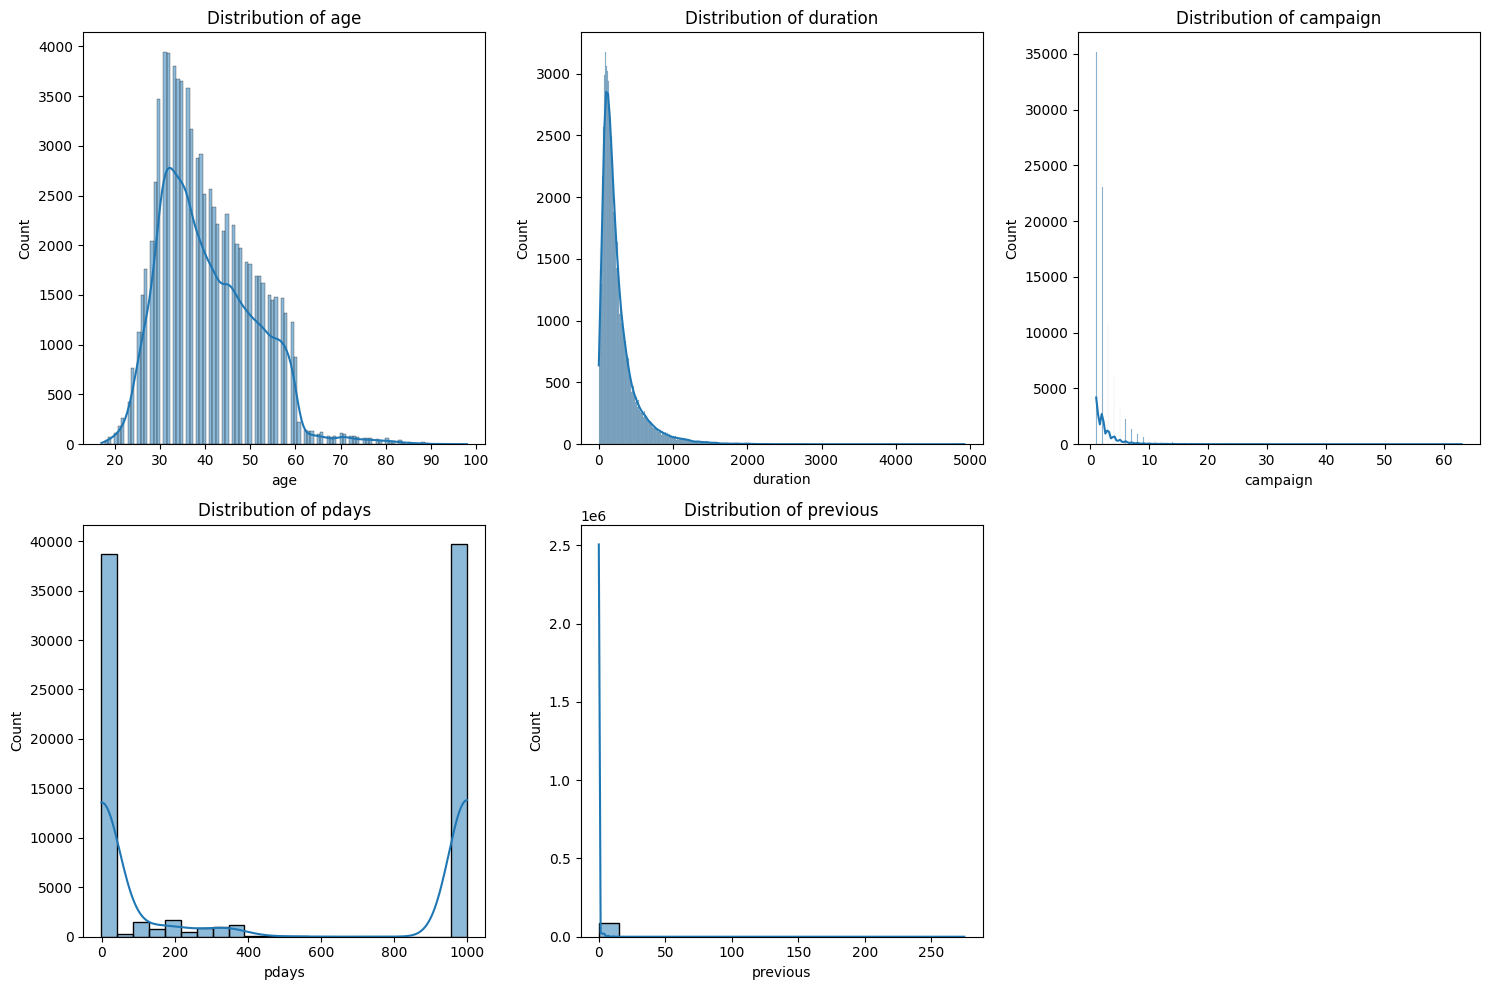

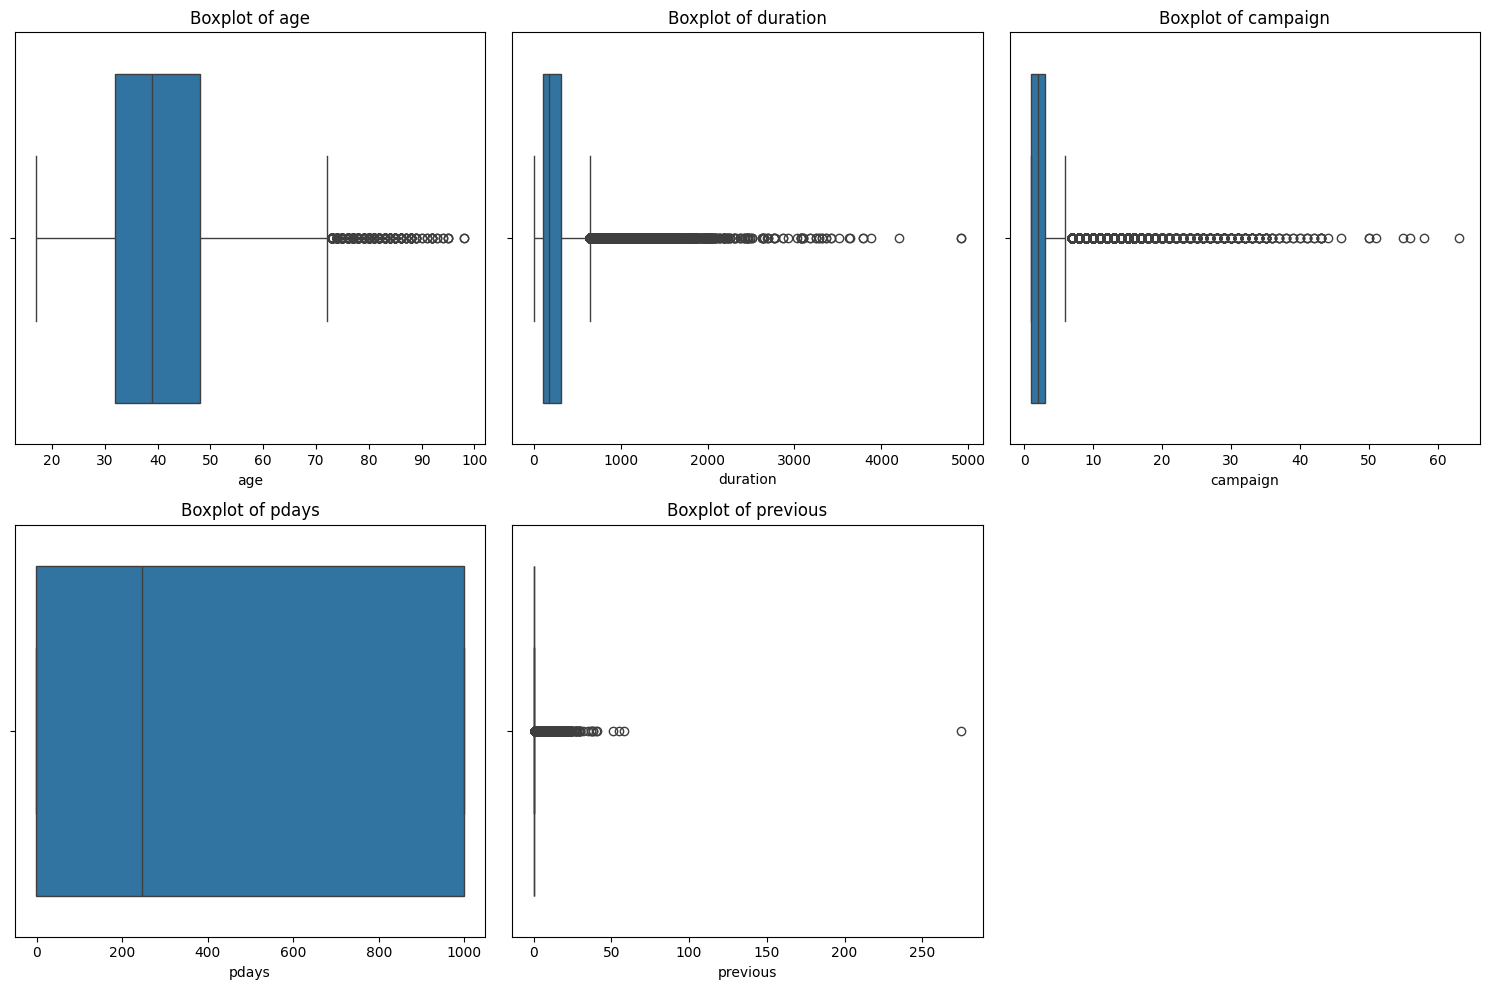

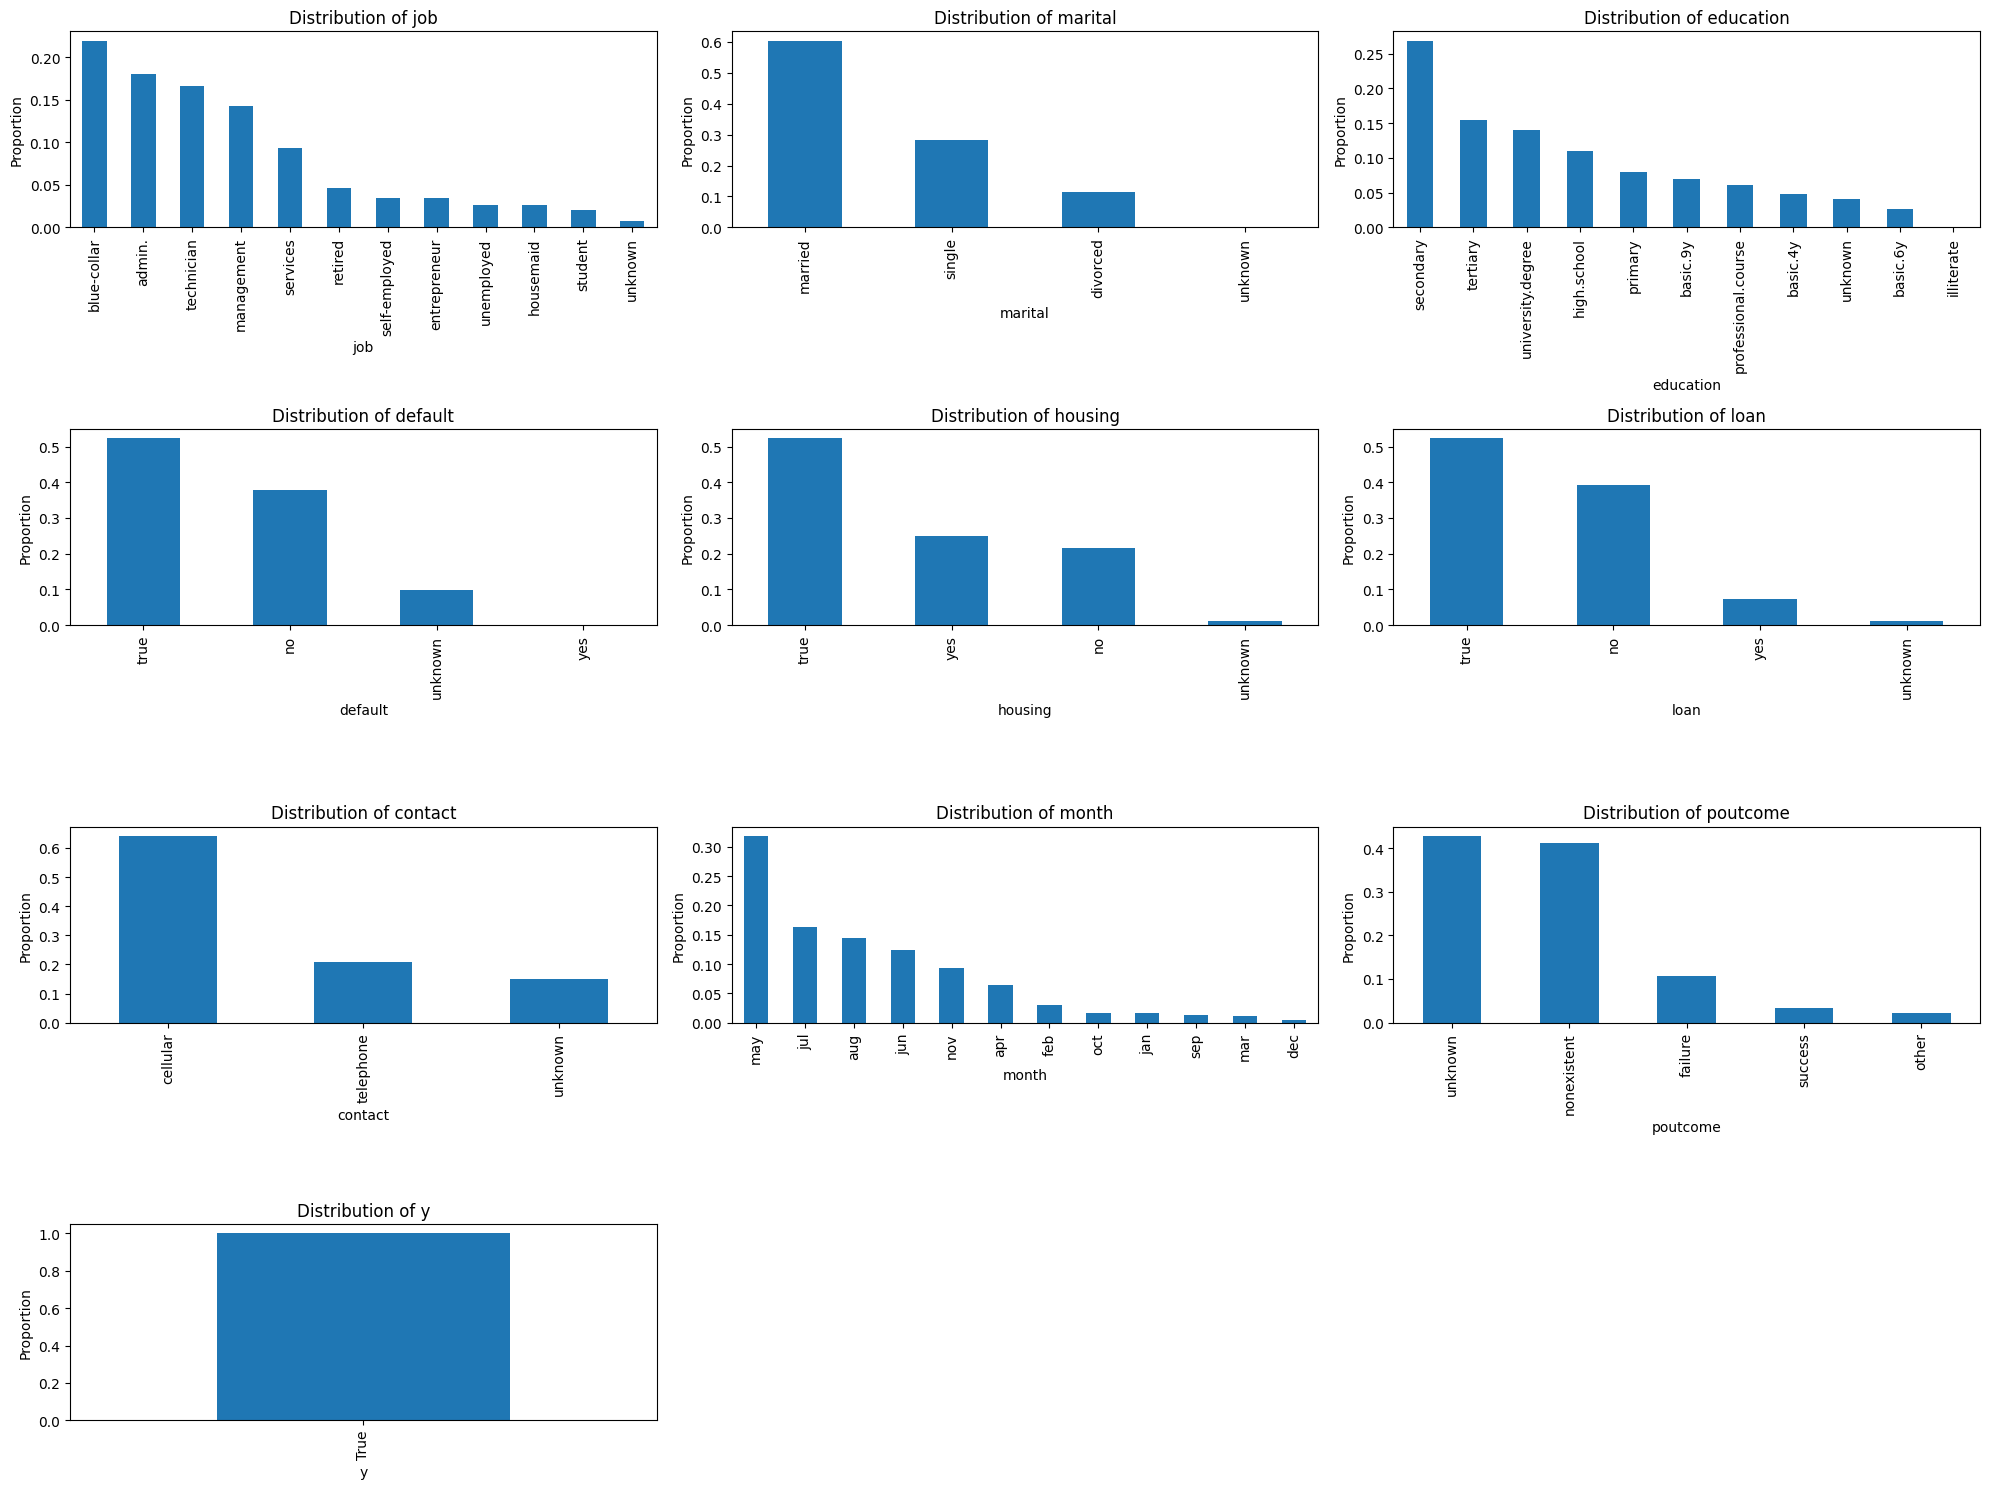

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_combined[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_combined[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features):
    plt.subplot(4, 3, i + 1)
    df_combined[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Analyze the potential impact of missing data (specifically in the 'balance' column) in the combined dataset `df_combined` and propose handling methods.


In [10]:
# Calculate the percentage of missing values in the 'balance' column
missing_balance_percentage = df_combined['balance'].isnull().sum() / len(df_combined) * 100
print(f"Percentage of missing values in 'balance' column: {missing_balance_percentage:.2f}%")

# Investigate potential reasons for missing data
# Group data by other variables and compare the missing rate of 'balance'
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']:
    print(f"\nMissing 'balance' rate by {col}:")
    print(df_combined.groupby(col)['balance'].apply(lambda x: x.isnull().sum() / len(x) * 100))

# Compare the distributions of other features between rows where 'balance' is missing and rows where it is not.
print("\nComparison of distributions for rows with and without 'balance':")
for col in ['age', 'duration', 'campaign', 'pdays', 'previous']:
    print(f"\n{col}:")
    print("With balance:", df_combined[df_combined['balance'].notnull()][col].describe())
    print("Without balance:", df_combined[df_combined['balance'].isnull()][col].describe())

Percentage of missing values in 'balance' column: 47.66%

Missing 'balance' rate by job:
job
admin.           66.831302
blue-collar      48.738478
entrepreneur     49.473327
housemaid        46.086957
management       23.614925
retired          43.144149
self-employed    47.366667
services         48.848664
student          48.262548
technician       47.007533
unemployed       43.763487
unknown          53.398058
Name: balance, dtype: float64

Missing 'balance' rate by marital:
marital
divorced     46.964759
married      47.800902
single       47.482960
unknown     100.000000
Name: balance, dtype: float64

Missing 'balance' rate by education:
education
basic.4y               100.000000
basic.6y               100.000000
basic.9y               100.000000
high.school            100.000000
illiterate             100.000000
primary                  0.000000
professional.course    100.000000
secondary                0.000000
tertiary                 0.000000
university.degree      100.000000

**Reasoning**:
Based on the analysis of missing data, propose and justify a preferred method for handling the missing 'balance' values.



In [11]:
# Propose and justify a preferred method for handling missing 'balance' values.

# Method 1: Remove rows with missing 'balance'
print("Method 1: Remove rows with missing 'balance'")
df_dropped = df_combined.dropna(subset=['balance'])
print(f"Remaining rows after dropping: {len(df_dropped)} ({len(df_dropped) / len(df_combined) * 100:.2f}%)")

# Method 2: Impute with the median 'balance'
print("\nMethod 2: Impute with the median 'balance'")
df_median_imputed = df_combined.copy()
median_balance = df_combined['balance'].median()
df_median_imputed['balance'] = df_median_imputed['balance'].fillna(median_balance)
print(f"Median balance: {median_balance}")

# Method 3: Impute with the median 'balance' for each job category.
print("\nMethod 3: Impute with the median 'balance' for each job category")
df_job_median_imputed = df_combined.copy()
for job_type in df_combined['job'].unique():
    median_balance_job = df_combined[df_combined['job'] == job_type]['balance'].median()
    df_job_median_imputed.loc[(df_job_median_imputed['balance'].isnull()) & (df_job_median_imputed['job'] == job_type), 'balance'] = median_balance_job

# Preferred method and justification
print("\nPreferred Method:")
print("Method 3: Impute with the median 'balance' for each job category is preferred.")
print("Justification:")
print("The missing 'balance' values show a strong correlation to the 'job' category.  Imputing using the median within each job category preserves this relationship better than removing rows or imputing the overall median, which may obscure underlying patterns and relationships in the data.")

Method 1: Remove rows with missing 'balance'
Remaining rows after dropping: 45211 (52.34%)

Method 2: Impute with the median 'balance'
Median balance: 448.0

Method 3: Impute with the median 'balance' for each job category

Preferred Method:
Method 3: Impute with the median 'balance' for each job category is preferred.
Justification:
The missing 'balance' values show a strong correlation to the 'job' category.  Imputing using the median within each job category preserves this relationship better than removing rows or imputing the overall median, which may obscure underlying patterns and relationships in the data.


## Summary:

### 1. Q&A

* **What is the percentage of missing values in the 'balance' column?**  Initially, 47.66% of the 'balance' values were missing.
* **What is the preferred method for handling missing 'balance' values and why?**  Imputing with the median 'balance' for each job category is preferred.  Missing 'balance' data shows a strong correlation with the 'job' category, and imputing by job category preserves this relationship, minimizing potential data distortion.
* **What are the other methods for handling missing 'balance' values considered in the analysis?** Removing rows with missing 'balance' values and imputing with the overall median 'balance'.

### 2. Data Analysis Key Findings

* **Data Inconsistencies:** Significant differences exist between the two original datasets (`df1` and `df2`), particularly in categorical variable encoding (e.g., 'education', 'default', 'housing', 'loan', 'poutcome') and the distributions of numerical variables like `pdays` (962 mean in `df1` vs. 40 mean in `df2`).
* **Missing 'balance' data**: 47.66% of 'balance' values were missing, with the missing rate varying significantly across different job categories (e.g., 66.83% for 'admin.' vs. 23.61% for 'management'). The 'contact' method also showed a strong correlation; 'telephone' contacts had an 83.81% missing rate for 'balance'.
* **Correlation between 'pdays' and missing 'balance'**: The distributions of the 'pdays' feature differ significantly between rows with and without 'balance' values, suggesting a potential link.
* **'duration' vs 'job':** The average call duration ('duration') varies across different job categories ('job') in both datasets.


### 3. Insights or Next Steps

* **Investigate data inconsistencies:**  Further explore and resolve the discrepancies between the two original datasets, particularly in categorical variables and `pdays`.
* **Refine missing data handling:**  Consider alternative imputation methods or investigate the root cause of the missing 'balance' data (e.g., are there other related variables that could help predict it?), possibly modeling the missing 'balance' based on other features.
